In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np 


In [2]:
import pandas as pd
#https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

data = pd.read_csv("wholesale.csv")

# Drop non-continuous variables
data.drop(["Channel", "Region"], axis = 1, inplace = True)

In [3]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [4]:
data = data[["Grocery", "Milk"]]
data = data.to_numpy().astype("float32", copy = False)

In [5]:
stscaler = StandardScaler().fit(data)
data = stscaler.transform(data)

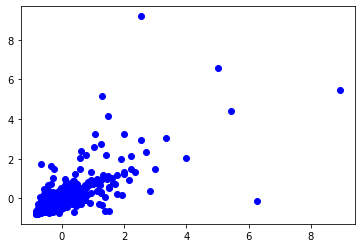

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
x = data[:,0]
y = data[:,1]
plt.plot(x,y,'bo')

In [7]:
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(data)


In [8]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

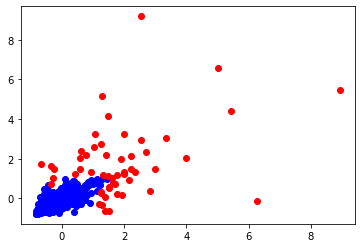

In [9]:
plt.plot(x[core_samples==True],y[core_samples==True],'bo')
plt.plot(x[core_samples==False],y[core_samples==False],'ro')

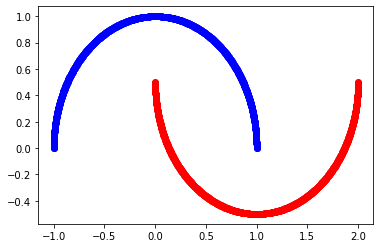

In [10]:
from sklearn.datasets import make_moons
#moons_X: Data, moon_y: Labels
moons_X, moon_y = make_moons(n_samples = 2000)
x = moons_X[:,0];
y = moons_X[:,1];
plt.plot(x[moon_y==0],y[moon_y==0],'bo')
plt.plot(x[moon_y==1],y[moon_y==1],'ro')


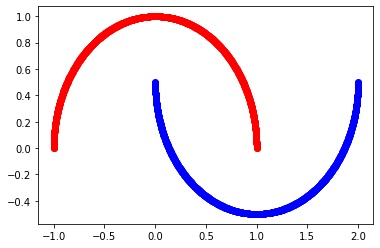

In [11]:
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(moons_X)
labels = dbsc.labels_
plt.plot(x[labels==0],y[labels==0],'bo')
plt.plot(x[labels==1],y[labels==1],'ro')

In [12]:
def add_noise(X,y, noise_level = 0.01):
    #The number of points we wish to make noisy
    amt_noise = int(noise_level*len(y))
    #Pick amt_noise points at random
    idx = np.random.choice(len(X), size = amt_noise)
    #Add random noise to these selected points
    noise = np.random.random((amt_noise, 2) ) -0.5
    X[idx,:] += noise
    return X

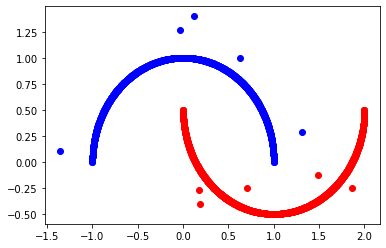

In [13]:
ndata = add_noise(moons_X,range(100),0.1)
x = ndata[:,0];
y = ndata[:,1];
plt.plot(x[moon_y==0],y[moon_y==0],'bo')
plt.plot(x[moon_y==1],y[moon_y==1],'ro')

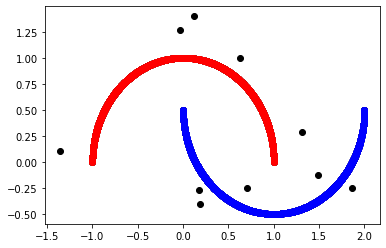

In [14]:
dbsc = DBSCAN(eps = .1, min_samples = 10).fit(ndata)
labels = dbsc.labels_
plt.plot(x,y,'ko')
plt.plot(x[labels==0],y[labels==0],'bo')
plt.plot(x[labels==1],y[labels==1],'ro')

In [15]:
from sklearn.cluster import KMeans
LOOPS = 20
MAX_ITERATIONS = 10
INITIALIZE_CLUSTERS = 'k-means++'
CONVERGENCE_TOLERANCE = 0.001
NUM_THREADS = 2

kmeans = KMeans(n_clusters=3, max_iter=MAX_ITERATIONS,
                       init=INITIALIZE_CLUSTERS , tol=CONVERGENCE_TOLERANCE, n_jobs=NUM_THREADS)
kmeans.fit(ndata)
kmeans.cluster_centers_

array([[ 1.57198038, -0.16738134],
       [-0.51767825,  0.67774941],
       [ 0.52186292,  0.22012043]])

In [16]:
kmeans.labels_

array([0, 2, 0, ..., 0, 1, 2], dtype=int32)

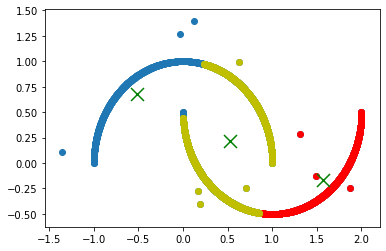

In [17]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',s=169,linewidths=3,color='g',zorder=10)
plt.scatter(ndata[:,0],ndata[:,1])
xy = ndata[kmeans.labels_==0]

plt.scatter(xy[:,0],xy[:,1],color='r')
xy = ndata[kmeans.labels_==2]

plt.scatter(xy[:,0],xy[:,1],color='y')
plt.show()